#### Can we quantify the TSNE plots?

Prepared by: Grace Patlewicz <br>
Modified on: 26 January 2023 <br>
Changes: Addressing question from reviewer in terms of whether it is possible to test the difference between actives and inactives in the TSNE landscape. Attempted to implement MRPP but R contains a package which optimises the procedure more efficiently. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import openpyxl
%matplotlib inline

In [2]:
TOP = os.getcwd().replace('notebooks', '')
raw_dir = TOP + 'data/raw/'
processed_dir = TOP + 'data/processed/'
interim_dir = TOP + 'data/interim/'
external_dir = TOP + 'data/external/'
figures_dir = TOP + 'reports/figures/'

In [3]:
df = pd.read_csv(processed_dir+'TxPs_hitcall_190822.csv')

In [4]:
from scipy.spatial.distance import pdist, squareform

In [5]:
def prep_df(df):
    df1 = df.copy()
    df1 = df1.set_index('dsstox_substance_id')
    df1.drop(['chnm', 'casn'], axis = 1, inplace = True)
    return df1

In [6]:
df = prep_df(df)
df

,atom:element_main_group,atom:element_metal_group_I_II,atom:element_metal_group_III,atom:element_metal_metalloid,atom:element_metal_poor_metal,atom:element_metal_transistion_metal,atom:element_noble_gas,bond:C#N_cyano_acylcyanide,bond:C#N_cyano_cyanamide,bond:C#N_cyano_cyanohydrin,...,ring:polycycle_spiro_[2.2]pentane,ring:polycycle_spiro_[2.5]octane,ring:polycycle_spiro_[4.5]decane,ring:polycycle_spiro_1_4-dioxaspiro[4.5]decane,ring:polycycle_tricyclo_[3.5.5]_cyclopropa[cd]pentalene,ring:polycycle_tricyclo_[3.7.7]bullvalene,ring:polycycle_tricyclo_[3.7.7]semibullvalene,ring:polycycle_tricyclo_adamantane,ring:polycycle_tricyclo_benzvalene,hitc
dsstox_substance_id,,,,,,,,,,,,,,,,,,,,,
DTXSID1045081,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID6025513,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
DTXSID8026727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
DTXSID8022408,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
DTXSID1045083,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DTXSID4032611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID3031864,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
DTXSID5020607,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
results = {}
for i, group in df.groupby('hitc'):
    results[i] = group.drop(['hitc'], axis = 1)


In [8]:
results[0]

,atom:element_main_group,atom:element_metal_group_I_II,atom:element_metal_group_III,atom:element_metal_metalloid,atom:element_metal_poor_metal,atom:element_metal_transistion_metal,atom:element_noble_gas,bond:C#N_cyano_acylcyanide,bond:C#N_cyano_cyanamide,bond:C#N_cyano_cyanohydrin,...,ring:polycycle_bicyclo_propene,ring:polycycle_spiro_[2.2]pentane,ring:polycycle_spiro_[2.5]octane,ring:polycycle_spiro_[4.5]decane,ring:polycycle_spiro_1_4-dioxaspiro[4.5]decane,ring:polycycle_tricyclo_[3.5.5]_cyclopropa[cd]pentalene,ring:polycycle_tricyclo_[3.7.7]bullvalene,ring:polycycle_tricyclo_[3.7.7]semibullvalene,ring:polycycle_tricyclo_adamantane,ring:polycycle_tricyclo_benzvalene
dsstox_substance_id,,,,,,,,,,,,,,,,,,,,,
DTXSID1045081,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID1045083,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID6045088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID1045089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID0045090,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DTXSID0032493,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID7024035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID3024102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
def distance_matrix(df):
    '''
    Function to create a pairwise square distance matrix using the Jaccard index
    '''
    D_mgrn = pd.DataFrame(squareform(pdist(df, 'jaccard')), columns = df.index, index = df.index)

    return D_mgrn

In [10]:
distance_dict = {}
for k,v in results.items():
    distance_dict[k] = distance_matrix(v)

(array([2.0040000e+03, 2.9420000e+03, 7.4340000e+03, 1.1917000e+04,
        2.6292000e+04, 1.1793900e+05, 3.1109800e+05, 8.9786400e+05,
        2.8154020e+06, 1.0099639e+07]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

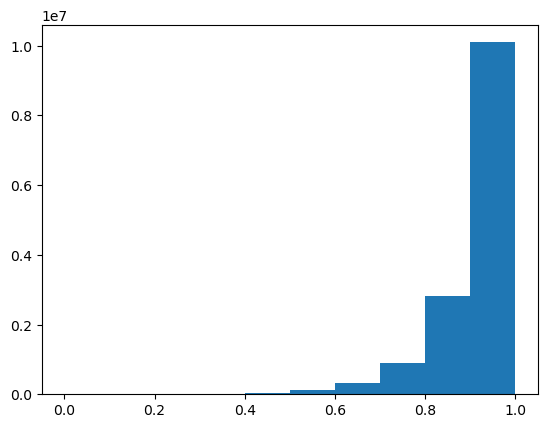

In [11]:
plt.hist(squareform(distance_dict[0]))

In [12]:
np.mean(squareform(distance_dict[0]))

0.9208431163962265

In [13]:
len((distance_dict[0]))

5347

In [14]:
np.mean(squareform(distance_dict[1]))

0.9119728047070373

In [15]:
len(distance_dict[1])

2185

In [16]:
5347+2185

7532

Observed D statistic

In [17]:
((5347/7532)*np.mean(squareform(distance_dict[0]))) + ((2185/7532)*np.mean(squareform(distance_dict[1])))

0.9182698780742831

In [19]:
test = df.copy()

In [26]:
np.unique(np.random.permutation(test['hitc']),return_counts = True)

(array([0, 1]), array([5347, 2185]))

In [ ]:
#unique_elements, counts_elements = np.unique(a, return_counts=True)

In [27]:
test['hitc']

dsstox_substance_id
DTXSID1045081    0
DTXSID6025513    1
DTXSID8026727    1
DTXSID8022408    1
DTXSID1045083    0
                ..
DTXSID4032611    0
DTXSID3031864    1
DTXSID5020607    1
DTXSID8024109    0
DTXSID0032520    1
Name: hitc, Length: 7532, dtype: int64

In [28]:
def result_df(df):
    df1 = df.copy()
    df1['hitc'] = np.random.permutation(df1['hitc'])
    res = {}
    for i, group in df1.groupby('hitc'):
        res[i] = group.drop(['hitc'], axis = 1)
    return res
    

In [29]:
def distance(res):
    dist_dict = {}
    for k,v in res.items():
        dist_dict[k] = distance_matrix(v)
    return dist_dict

In [30]:
def D_statistic(d):
    n0 = 5347
    n1 = 2185
    nt = 7532
    a = (n0/nt) * np.mean(squareform(d[0]))
    b = (n1/nt) * np.mean(squareform(d[1]))
    
    return a + b
    

In [31]:
def plugin(df):
    summary = {}
    summary['R'] = result_df(df)
    summary['D'] = distance(summary['R'])
    summary['Dstat'] = D_statistic(summary['D'])
    return summary['Dstat']
                                   


In [34]:
mylst = []
for i in range(0,500):
    mylst.append(plugin(df))

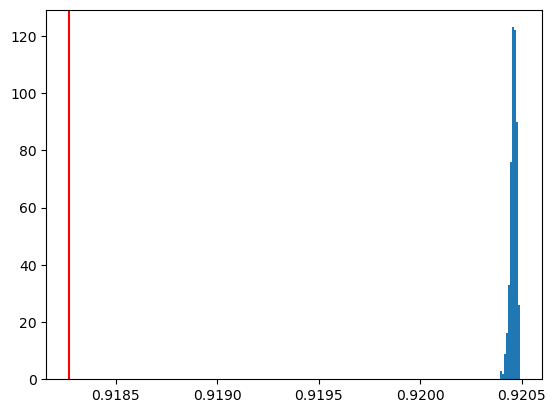

In [111]:
plt.hist(mylst);
plt.axvline(x=0.9182698780742831, color = 'r')

In [55]:
np.mean(mylst)

0.920457935185122

In [58]:
from sklearn.metrics import pairwise_distances

In [62]:
def dist_scikit(df):
    return pd.DataFrame(pairwise_distances(df.values,  metric='jaccard'), columns = df.index, index = df.index)

In [79]:
def prep(df):
    '''
    Preparatory wrangling for between group distances
    '''
    df = pd.DataFrame(df.where(np.triu(np.ones(df.shape)).astype(bool)).unstack())
    df.index.names = ["dtxsid", "dtxsid2"] 
    df = df.stack().reset_index().dropna(subset = [0])
    df = df[df['dtxsid'] != df['dtxsid2']]
    return df

In [75]:
mylst2 = []
for i, group in df.groupby('hitc'):
     mylst2.append(group[['hitc']].index)

In [78]:
mylst2[0]

Index(['DTXSID1045081', 'DTXSID1045083', 'DTXSID6045088', 'DTXSID1045089',
       'DTXSID0045090', 'DTXSID5045093', 'DTXSID4022810', 'DTXSID0032029',
       'DTXSID2040608', 'DTXSID2045105',
       ...
       'DTXSID3024289', 'DTXSID8033566', 'DTXSID0032497', 'DTXSID9020827',
       'DTXSID2025680', 'DTXSID0032493', 'DTXSID7024035', 'DTXSID3024102',
       'DTXSID4032611', 'DTXSID8024109'],
      dtype='object', name='dsstox_substance_id', length=5347)

In [80]:
D_mgrn = dist_scikit(df.iloc[:,:-1])

/home/grace/anaconda3/envs/pfas_dap/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [103]:
D_mgrn_c = prep(D_mgrn)

In [104]:
test = D_mgrn_c.head(10)

In [105]:
test

,dtxsid,dtxsid2,level_2,0
1,DTXSID6025513,DTXSID1045081,0,0.862069
3,DTXSID8026727,DTXSID1045081,0,0.960000
4,DTXSID8026727,DTXSID6025513,0,1.000000
6,DTXSID8022408,DTXSID1045081,0,0.809524
7,DTXSID8022408,DTXSID6025513,0,0.965517
8,DTXSID8022408,DTXSID8026727,0,0.954545
10,DTXSID1045083,DTXSID1045081,0,0.636364
11,DTXSID1045083,DTXSID6025513,0,0.906250
12,DTXSID1045083,DTXSID8026727,0,1.000000
13,DTXSID1045083,DTXSID8022408,0,0.961538


In [ ]:
#df['col_3'] = df.apply(lambda x: get_sublist(x.col_1, x.col_2), axis=1)